In [1]:
import numpy as np
import h5py
from sklearn.manifold import Isomap
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import corner
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

In [2]:
file = h5py.File(r"C:\Users\Admin\OneDrive\Desktop\sample_2e7_design_precessing_higherordermodes_3detectors.h5",'r')
data = []

for idx, name in enumerate(list(file.keys())):
    data.append(file[name][0:1000])

data = pd.DataFrame(np.transpose(data))
data.columns = list(file.keys())
data

chi1x     chi1y     chi1z     chi2x     chi2y     chi2z       dec  \
0   -0.307201  0.276165 -0.430760 -0.161114 -0.092334 -0.414647 -0.329671   
1   -0.734712 -0.498493 -0.298162  0.057532 -0.844992  0.014708  0.526740   
2   -0.057831 -0.703796 -0.354512 -0.215538  0.016323  0.130543  0.315799   
3    0.015260 -0.202467 -0.492768 -0.237033 -0.365363 -0.876192  0.432105   
4   -0.016731  0.007848  0.005007  0.147519  0.231879  0.086716 -0.458711   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.576429 -0.645197  0.106358  0.779329  0.480224  0.302788 -0.164741   
996 -0.134131  0.205700 -0.107687 -0.046215  0.361217 -0.813627 -1.245679   
997  0.216536 -0.100850  0.299994  0.088451  0.136617 -0.121935  1.036102   
998  0.274411 -0.156249 -0.064642  0.302982  0.366175  0.325817  0.919502   
999 -0.072194  0.105715 -0.220071 -0.314661  0.168661  0.571471 -0.766385   

     det      iota        mtot       psi         q        ra        snr  \
0    0.0  1.809310  906.803562  1.286031  0.624780 -3.116784   0.822509   
1    0.0  0.820820   59.102112  0.934308  0.986650  1.360291   1.093237   
2    0.0  2.008206   44.602750  1.535520  0.286199  0.079973   1.305398   
3    0.0  2.018398  534.378032  3.064086  0.538882 -1.780558   9.112974   
4    1.0  2.037363  573.821705  0.752211  0.846310  2.789289  17.525534   
..   ...       ...         ...       ...       ...       ...        ...   
995  0.0  1.784171  905.125763  2.367827  0.466528 -0.034750   0.993533   
996  0.0  2.560637  264.862843  1.422802  0.642199  2.816555   3.599715   
997  1.0  0.415292  408.083801  3.102616  0.756706 -1.027694  20.986058   
998  0.0  2.010860  588.336562  3.114282  0.692634 -2.490513   2.113289   
999  0.0  1.424152  938.453066  1.771673  0.104342 -1.470740   0.178273   

            z  
0    2.139659  
1    2.438707  
2    1.869461  
3    0.428061  
4    0.772609  
..        ...  
995  3.260640  
996  3.244858  
997  1.004410  
998  2.580256  
999  3.956172  

[1000 rows x 15 columns]

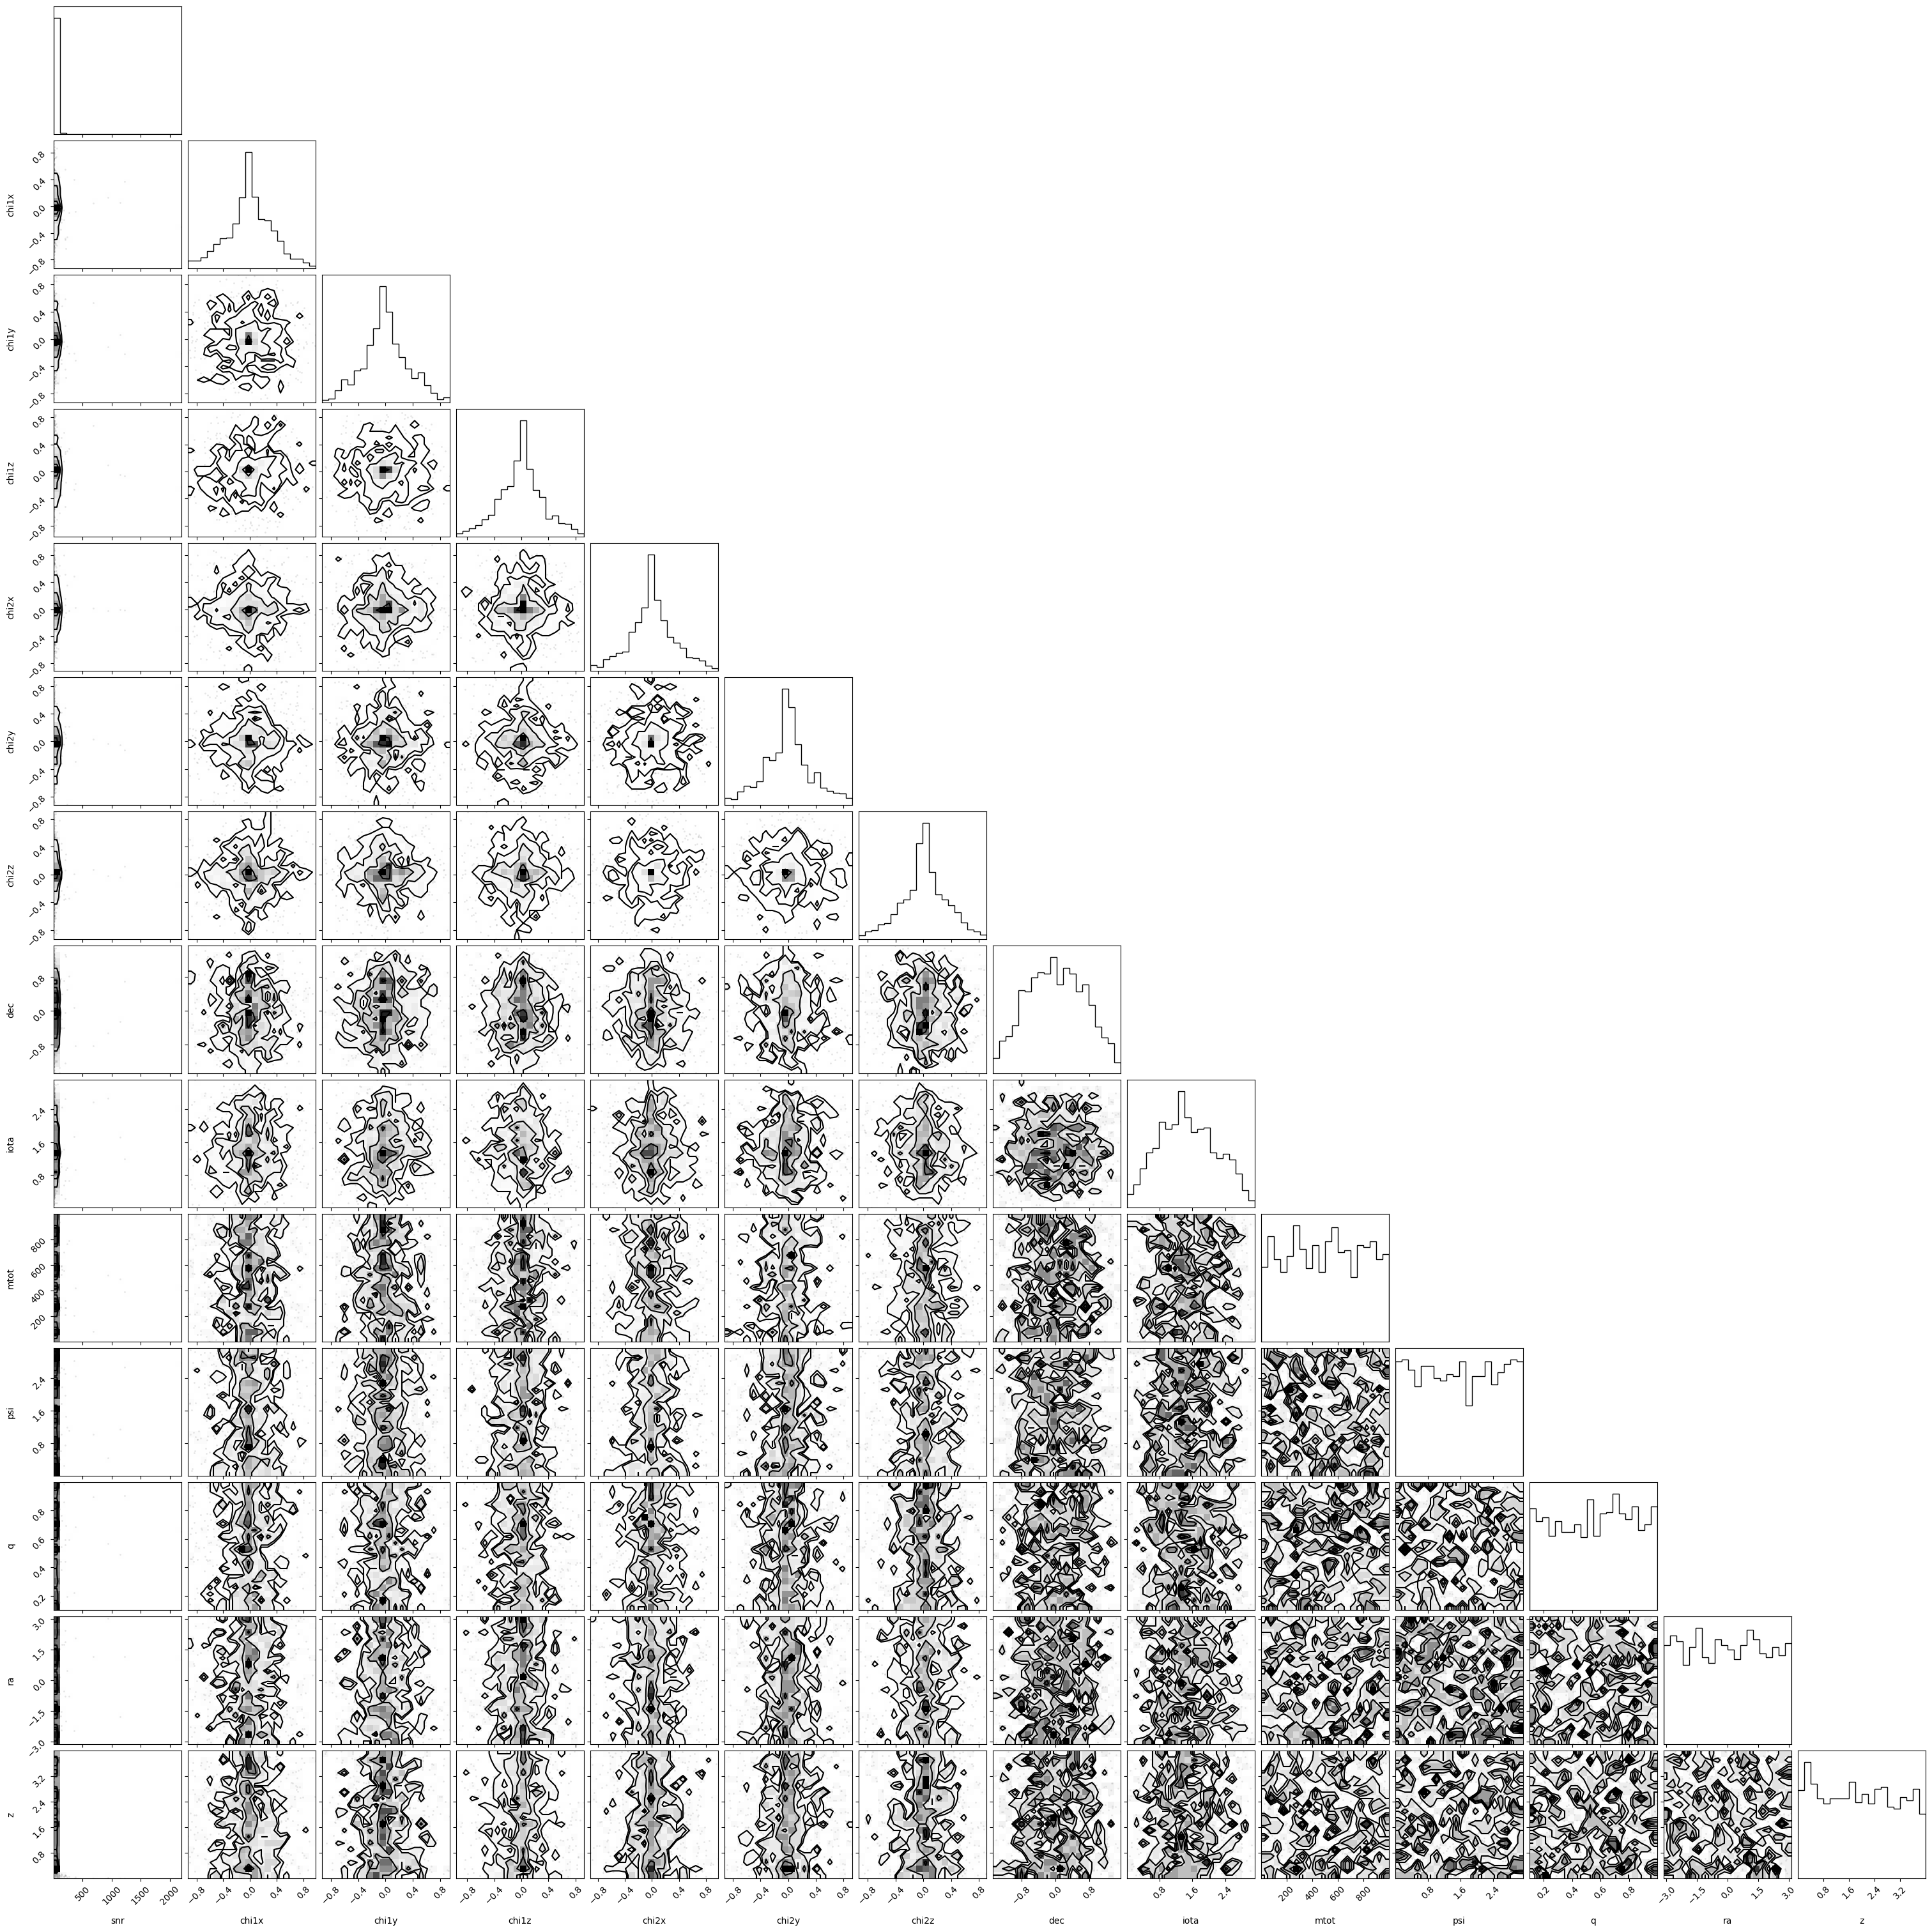

In [3]:
corner.corner(np.array([data['snr'], data['chi1x'], data['chi1y'], data['chi1z'], data['chi2x'], data['chi2y'], data['chi2z'], data['dec'], data['iota'], data['mtot'], data['psi'], data['q'], data['ra'], data['z']]).T, labels=['snr', 'chi1x', 'chi1y', 'chi1z', 'chi2x',	'chi2y', 'chi2z', 'dec', 'iota', 'mtot', 'psi', 'q', 'ra', 'z']);

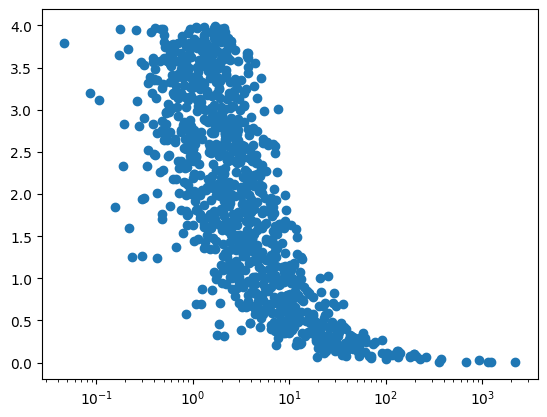

In [20]:
plt.scatter(data['snr'], data['z'])
plt.xscale('log')

In [5]:
attributes = ['chi1x', 'chi1y', 'chi1z', 'chi2x', 'chi2y', 'chi2z', 'dec','iota', 'mtot', 'psi', 'q', 'ra', 'z']
attributes_5 = ['iota', 'mtot', 'psi', 'q','z']
attributes_3 = ['iota', 'mtot', 'z']

In [6]:
scaler = StandardScaler().set_output(transform="pandas")
X_train, X_test, y_train, y_test = train_test_split(data[attributes], data['det'], test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Expained fractional variance of data encapsulated in the eigenvalues: [0.10321793 0.0935761  0.08949669 0.08727828 0.08539761 0.0796806
 0.07858841 0.07406825 0.06911106 0.06471113 0.06149397 0.05835232
 0.05502766]
1.0000000000000002


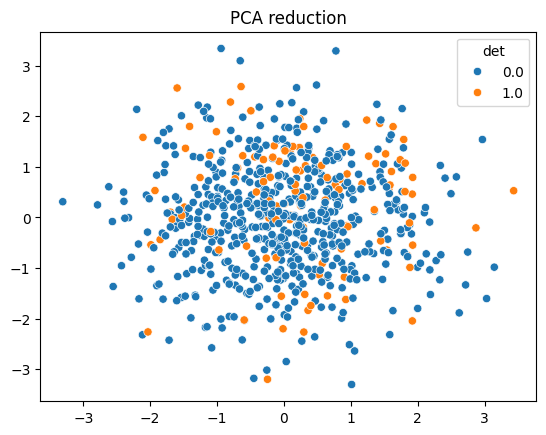

In [7]:
pca = PCA(n_components=13)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.fit_transform(X_test_scaled)

evals = pca.explained_variance_ratio_ 
print('Expained fractional variance of data encapsulated in the eigenvalues: ' + str(evals))
print(sum(evals))

sns.scatterplot(x = X_train_scaled_pca[:, 0], y = X_train_scaled_pca[:, 1], hue = y_train)
plt.title('PCA reduction');

Expained fractional variance of data encapsulated in the eigenvalues: [0.23526459 0.20888744 0.19997484 0.18960062 0.16627251]
0.9999999999999999


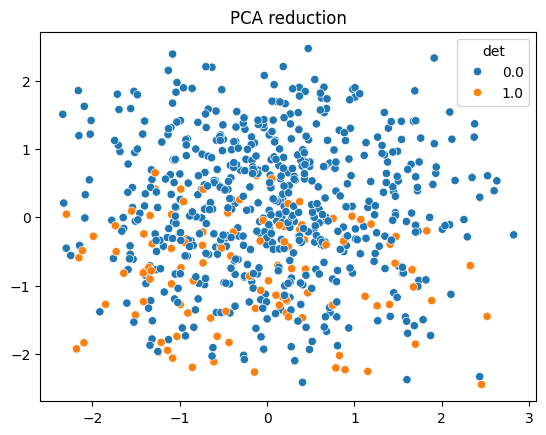

In [8]:
scaler = StandardScaler().set_output(transform="pandas")
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(data[attributes_5], data['det'], test_size=0.3, random_state=42)
X_train_scaled_5 = scaler.fit_transform(X_train_5)
X_test_scaled_5 = scaler.transform(X_test_5)

pca = PCA(n_components=5)
X_train_scaled_pca_5 = pca.fit_transform(X_train_scaled_5)
X_test_scaled_pca_5 = pca.fit_transform(X_test_scaled_5)

evals = pca.explained_variance_ratio_ 
print('Expained fractional variance of data encapsulated in the eigenvalues: ' + str(evals))
print(sum(evals))

sns.scatterplot(x = X_train_scaled_pca_5[:, 0], y = X_train_scaled_pca_5[:, 1], hue = y_train)
plt.title('PCA reduction');

Expained fractional variance of data encapsulated in the eigenvalues: [0.35387582 0.33139175 0.31473243]
1.0


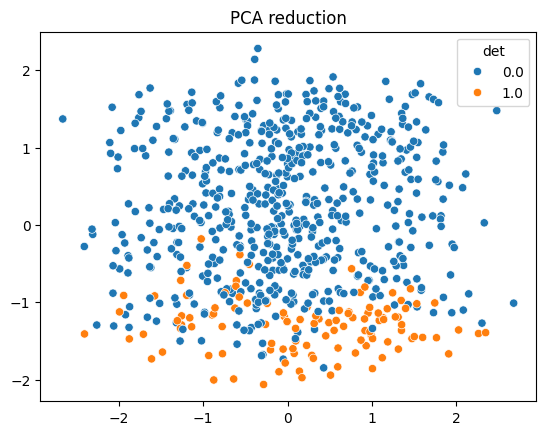

In [9]:
scaler = StandardScaler().set_output(transform="pandas")
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data[attributes_3], data['det'], test_size=0.3, random_state=42)
X_train_scaled_3 = scaler.fit_transform(X_train_3)
X_test_scaled_3 = scaler.transform(X_test_3)

pca = PCA(n_components=3)
X_train_scaled_pca_3 = pca.fit_transform(X_train_scaled_3)
X_test_scaled_pca_3 = pca.fit_transform(X_test_scaled_3)

evals = pca.explained_variance_ratio_ 
print('Expained fractional variance of data encapsulated in the eigenvalues: ' + str(evals))
print(sum(evals))

sns.scatterplot(x = X_train_scaled_pca_3[:, 0], y = X_train_scaled_pca_3[:, 1], hue = y_train)
plt.title('PCA reduction');

# Bagged Decision Tree

In [21]:
depth = np.arange(0, 21)
K=10

grid = GridSearchCV(DecisionTreeClassifier(), {'max_depth': depth}, scoring = 'neg_root_mean_squared_error', cv = K) # Try each depth with K-folds
grid.fit(X_train, y_train)
d_opt = grid.best_params_
print(d_opt)

ValueError: 
All the 210 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_depth' parameter of DecisionTreeClassifier must be an int in the range [1, inf) or None. Got 0 instead.

--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\tree\_classes.py", line 1009, in fit
    super()._fit(
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\tree\_classes.py", line 294, in _fit
    check_classification_targets(y)
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


Full dataset:

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    n_estimators=500, max_samples=100, 
    bootstrap=True, random_state=42, n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9566666666666667

PCA all attributes

In [11]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    n_estimators=500, max_samples=100, 
    bootstrap=True, random_state=42, n_jobs=-1)

bag_clf.fit(X_train_scaled_pca, y_train)

y_pred = bag_clf.predict(X_test_scaled_pca)

accuracy_score(y_test, y_pred)

0.8133333333333334

PCA 5 attributes

In [12]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    n_estimators=500, max_samples=100, 
    bootstrap=True, random_state=42, n_jobs=-1)

bag_clf.fit(X_train_scaled_pca_5, y_train_5)

y_pred_5 = bag_clf.predict(X_test_scaled_pca_5)

accuracy_score(y_test_5, y_pred_5)

0.75

PCA 3 attributes

In [13]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    n_estimators=500, max_samples=100, 
    bootstrap=True, random_state=42, n_jobs=-1)

bag_clf.fit(X_train_scaled_pca_3, y_train_3)

y_pred_3 = bag_clf.predict(X_test_scaled_pca_3)

accuracy_score(y_test_3, y_pred_3)

0.87

# Random Forest

Here I'll make a regression on the snr and putting a threshold at snr = 12

In [16]:
scaler = StandardScaler().set_output(transform="pandas")
X_train, X_test, y_train, y_test = train_test_split(data[attributes], data['snr'], test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
depth = np.arange(0, 21)
K=10

grid = GridSearchCV(RandomForestRegressor(), {'max_depth': depth}, scoring = 'neg_root_mean_squared_error', cv = K) # Try each depth with K-folds
grid.fit(X_train, y_train)
d_opt = grid.best_params_
print(d_opt)

C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constra

{'max_depth': 11}


In [19]:
model = RandomForestRegressor(max_depth = 11,random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#I define a threshold for the detectability.
y_pred_class = (y_pred > 12).astype(int)
y_test_class = (y_test > 12).astype(int)

accuracy_rfr = accuracy_score(y_test_class, y_pred_class)
accuracy_rfr

0.9533333333333334